In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import joblib
import os

file_name = "../data/diabetes.csv"

if not os.path.exists(file_name):
    raise FileNotFoundError("File not found.Please check")

df = pd.read_csv(file_name)
df = df.dropna()
if df.isnull().sum().any():
    raise ValueError("File contains null value")
features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
X = df[features]
y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaler_file = "../models/diabetes_scaler.pkl"

if os.path.exists(scaler_file):
    raise FileExistsError("File already exist.")
else:
    joblib.dump(scaler,scaler_file)

pd.DataFrame(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train,y_train)
file_name_pkl = "../models/Diabetes_model.pkl"
if os.path.exists(file_name_pkl):
    raise FileExistsError("File already exist")
else:
    joblib.dump(model,filename=file_name_pkl)
    print("Model trained and saved successfully!")

Model trained and saved successfully!


In [5]:
from sklearn.metrics import accuracy_score,classification_report
pred = model.predict(X_test)
accuracy = accuracy_score(y_test,pred)
classification = classification_report(y_test,pred)

print("prediction : \n",pred,"\n")
print("accuracy:",accuracy,"\n")
print("classification \n", classification)

prediction : 
 [0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0] 

accuracy: 0.7532467532467533 

classification 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



Confusion Matrix:
 [[79 20]
 [18 37]]


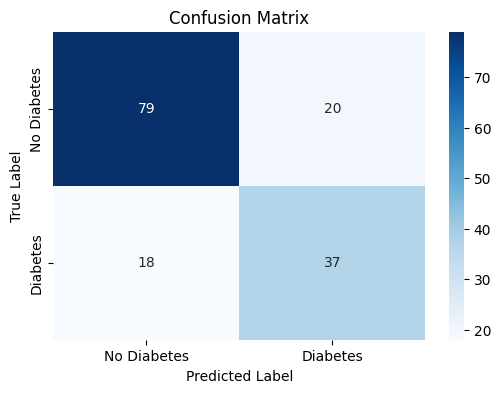

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


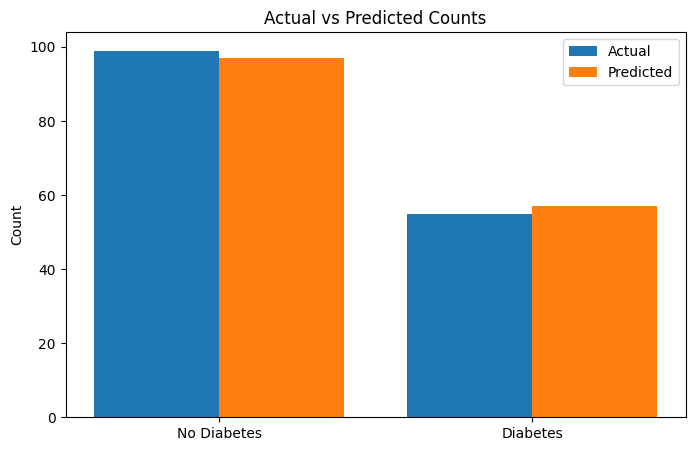

In [7]:
from collections import Counter
import numpy as np

count_pred = Counter(pred)
count_actual = Counter(y_test)

labels = ["No Diabetes", "Diabetes"]
x = np.arange(len(labels))

actual = [count_actual[0], count_actual[1]]
pred = [count_pred[0], count_pred[1]]

plt.figure(figsize=(8,5))
plt.bar(x - 0.2, actual, width=0.4, label='Actual')
plt.bar(x + 0.2, pred, width=0.4, label='Predicted')
plt.xticks(x, labels)
plt.ylabel("Count")
plt.title("Actual vs Predicted Counts")
plt.legend()
plt.show()
